In [3]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [218]:
df = pd.read_csv('apple_share_price.csv')

In [219]:
df.head()

,Date,Open,High,Low,Close,Volume
0,11-Aug-17,156.60,158.57,156.07,157.48,26257096
1,10-Aug-17,159.90,160.00,154.63,155.32,40804273
2,9-Aug-17,159.26,161.27,159.11,161.06,26131530
3,8-Aug-17,158.60,161.83,158.27,160.08,36205896
4,7-Aug-17,157.06,158.92,156.67,158.81,21870321


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1664 non-null   object 
 1   Open    1664 non-null   float64
 2   High    1664 non-null   float64
 3   Low     1664 non-null   float64
 4   Close   1664 non-null   float64
 5   Volume  1664 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 78.1+ KB


In [221]:
df.describe()

,Open,High,Low,Close,Volume
count,1664.000000,1664.00000,1664.000000,1664.000000,1.664000e+03
mean,91.604105,92.39149,90.760619,91.594525,7.958391e+07
std,28.258360,28.42185,28.094248,28.272351,5.446191e+07
min,45.240000,45.39000,44.360000,45.050000,1.147592e+07
25%,66.912500,67.59750,66.385000,66.835000,3.883495e+07
50%,92.150000,92.55500,90.950000,92.010000,6.576690e+07
75%,112.542500,113.75500,111.550000,112.650000,1.042734e+08
max,159.900000,161.83000,159.110000,161.060000,4.702467e+08


In [222]:
df.isnull()

,Date,Open,High,Low,Close,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1659,False,False,False,False,False,False
1660,False,False,False,False,False,False
1661,False,False,False,False,False,False
1662,False,False,False,False,False,False


In [223]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [244]:
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


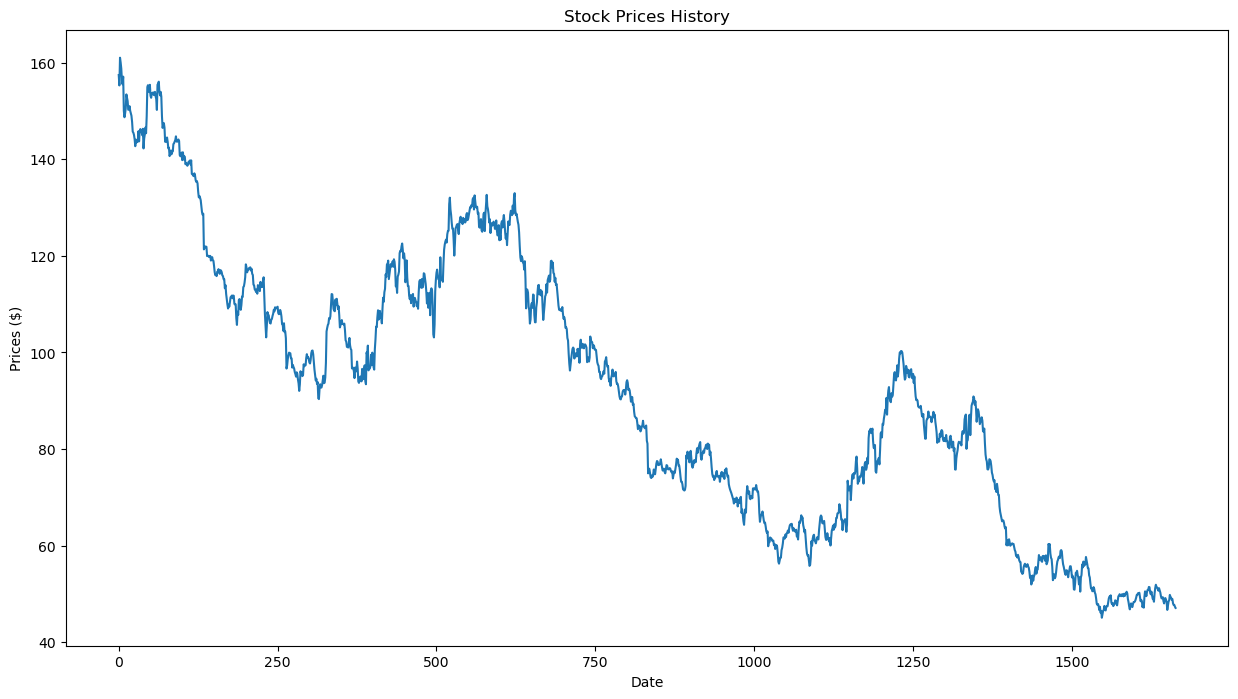

In [246]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(df['Close']) 
plt.xlabel('Date')
plt.ylabel('Prices ($)')
plt.show()

C:\Users\nilad\AppData\Local\Temp\ipykernel_14108\2042645353.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df.rolling(7).mean().head(15)
C:\Users\nilad\AppData\Local\Temp\ipykernel_14108\2042645353.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df.rolling(window=30).mean()['Open'].plot()


<AxesSubplot:>

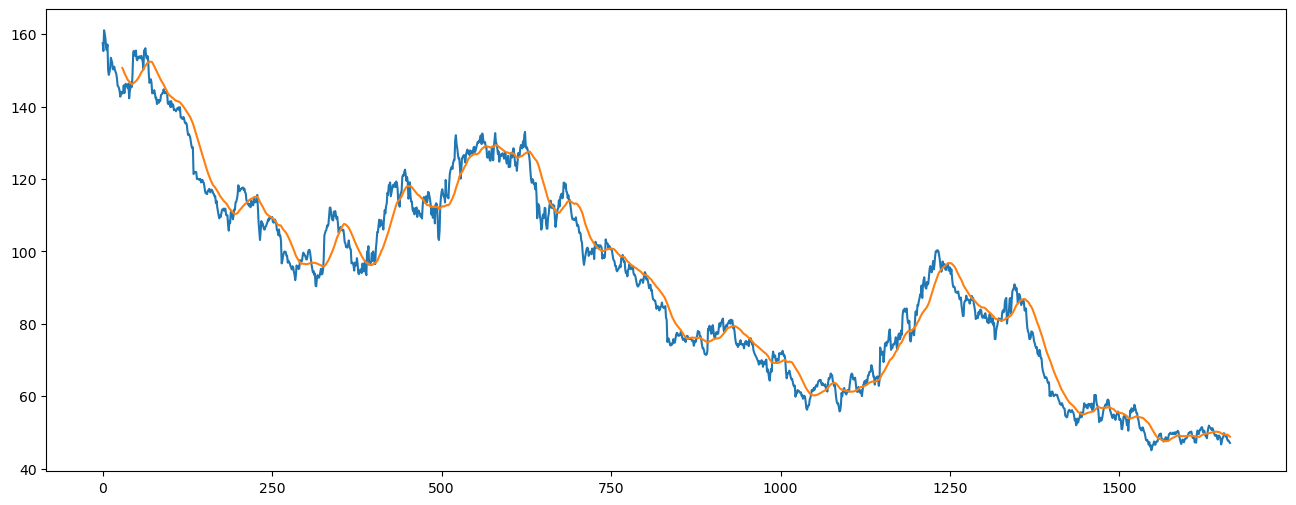

In [226]:

df.rolling(7).mean().head(15)
df['Close'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Open'].plot()

In [227]:

df1 = df.reset_index()['Close']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1) )
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1
    


array([[0.96914059],
       [0.95052151],
       [1.        ],
       ...,
       [0.02292906],
       [0.01965348],
       [0.01749849]])

In [228]:
train_size = int(len(df1)*0.75)
test_size = len(df1) - train_size
train_size, test_size

(1248, 416)

In [232]:
train_data, test_data = df1[0:train_size: ], df1[train_size:len(df1), :1]

In [233]:
def create_dataset(dataset, time_step = 1):
    data_x, data_y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0]
        data_x.append(a)
        data_y.append(dataset[i+time_step,0])
    return numpy.array(data_x), numpy.array(data_y)

In [235]:
import numpy as np

def create_dataset(dataset, time_step):
    data_x, data_y = [], []
    for i in range(len(dataset) - time_step):
        a = dataset[i : (i + time_step)]
        data_x.append(a)
        data_y.append(dataset[i + time_step, 0])
    return np.array(data_x), np.array(data_y)

time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [236]:

x_train
x_test

array([[[0.42841134],
        [0.42763555],
        [0.4353073 ],
        ...,
        [0.39513835],
        [0.39203517],
        [0.38048444]],

       [[0.42763555],
        [0.4353073 ],
        [0.4195328 ],
        ...,
        [0.39203517],
        [0.38048444],
        [0.3866046 ]],

       [[0.4353073 ],
        [0.4195328 ],
        [0.43073873],
        ...,
        [0.38048444],
        [0.3866046 ],
        [0.37350228]],

       ...,

       [[0.03999655],
        [0.02715283],
        [0.02422205],
        ...,
        [0.03335919],
        [0.02560124],
        [0.02267046]],

       [[0.02715283],
        [0.02422205],
        [0.02637704],
        ...,
        [0.02560124],
        [0.02267046],
        [0.02292906]],

       [[0.02422205],
        [0.02637704],
        [0.02077407],
        ...,
        [0.02267046],
        [0.02292906],
        [0.01965348]]])

In [237]:
import numpy as np
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)



In [238]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

from keras.layers import Dropout,  Bidirectional

In [239]:


model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:

model.fit(x_train, y_train, epochs=80,validation_data=(x_test, y_test), verbose=1)

Epoch 1/80
2/2 [==============================] - 4s 796ms/step - loss: 2279.8855 - val_loss: 10011.1250
Epoch 2/80
2/2 [==============================] - 0s 109ms/step - loss: 2207.0459 - val_loss: 9643.9414
Epoch 3/80
2/2 [==============================] - 0s 109ms/step - loss: 2132.4058 - val_loss: 9312.1602
Epoch 4/80
2/2 [==============================] - 0s 95ms/step - loss: 2073.1248 - val_loss: 8991.0879
Epoch 5/80
2/2 [==============================] - 0s 106ms/step - loss: 2016.1735 - val_loss: 8679.9004
Epoch 6/80
2/2 [==============================] - 0s 97ms/step - loss: 1959.5496 - val_loss: 8404.2939
Epoch 7/80
2/2 [==============================] - 0s 128ms/step - loss: 1912.9006 - val_loss: 8132.1807
Epoch 8/80
2/2 [==============================] - 0s 122ms/step - loss: 1859.8622 - val_loss: 7822.3604
Epoch 9/80
2/2 [==============================] - 0s 135ms/step - loss: 1803.5601 - val_loss: 7511.1768
Epoch 10/80
2/2 [==============================] - 0s 127ms/step 

In [247]:
test_predict = model.predict(x_test)
train_predict = model.predict(x_train)


36/36 [==============================] - 1s 30ms/step


In [251]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)





In [252]:
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[back:len(train_predict)+back, :] = train_predict


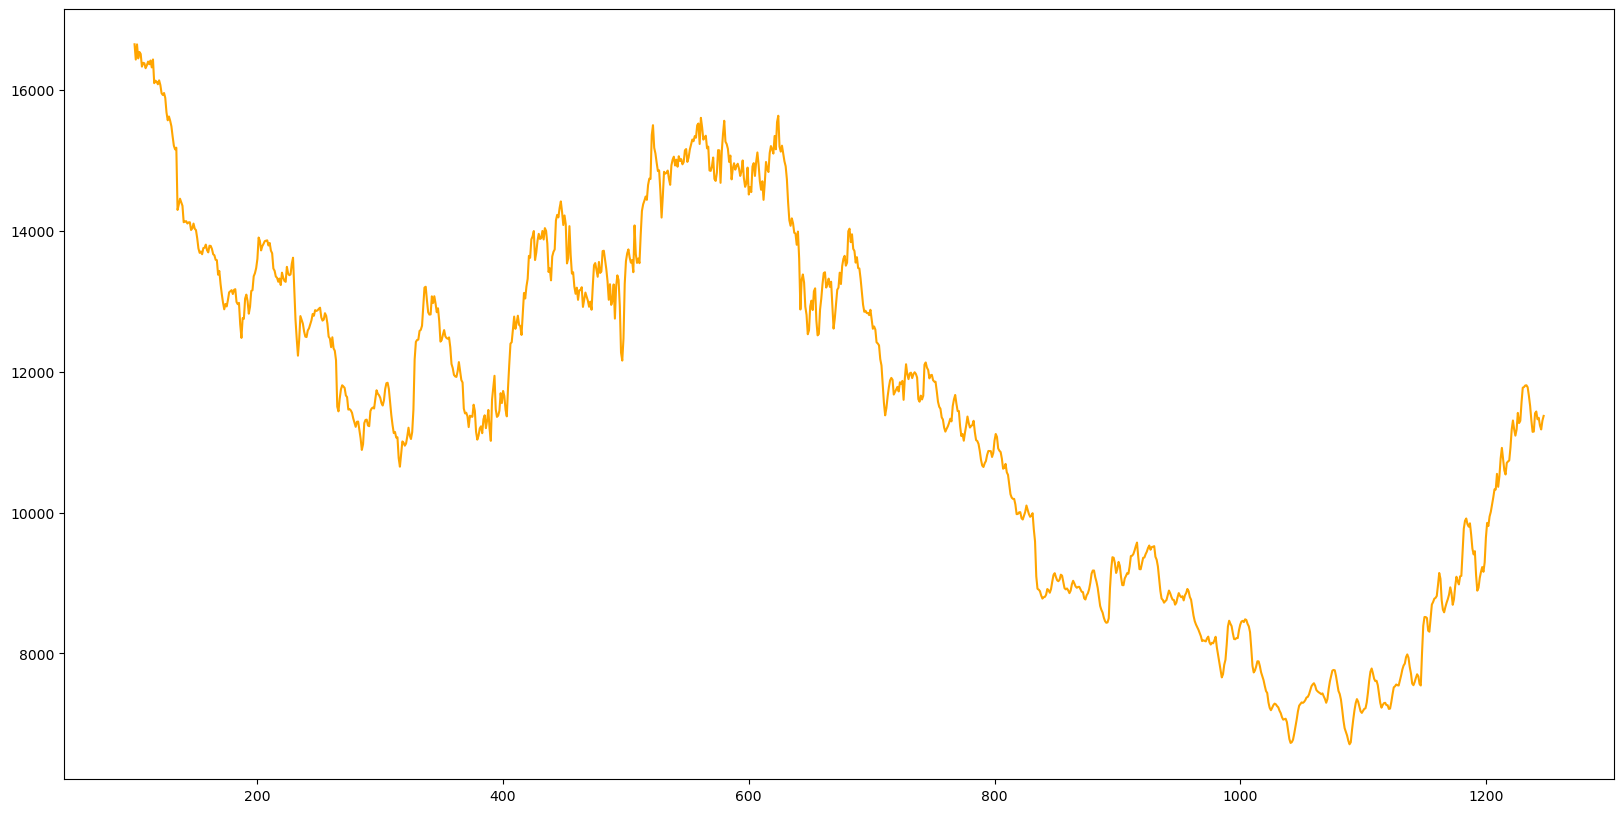

In [266]:

plt.subplots(figsize=(20,10))
plt.plot(trainPredictPlot,color='orange')
plt.plot(testPredictPlot,color='blue')
plt.show()

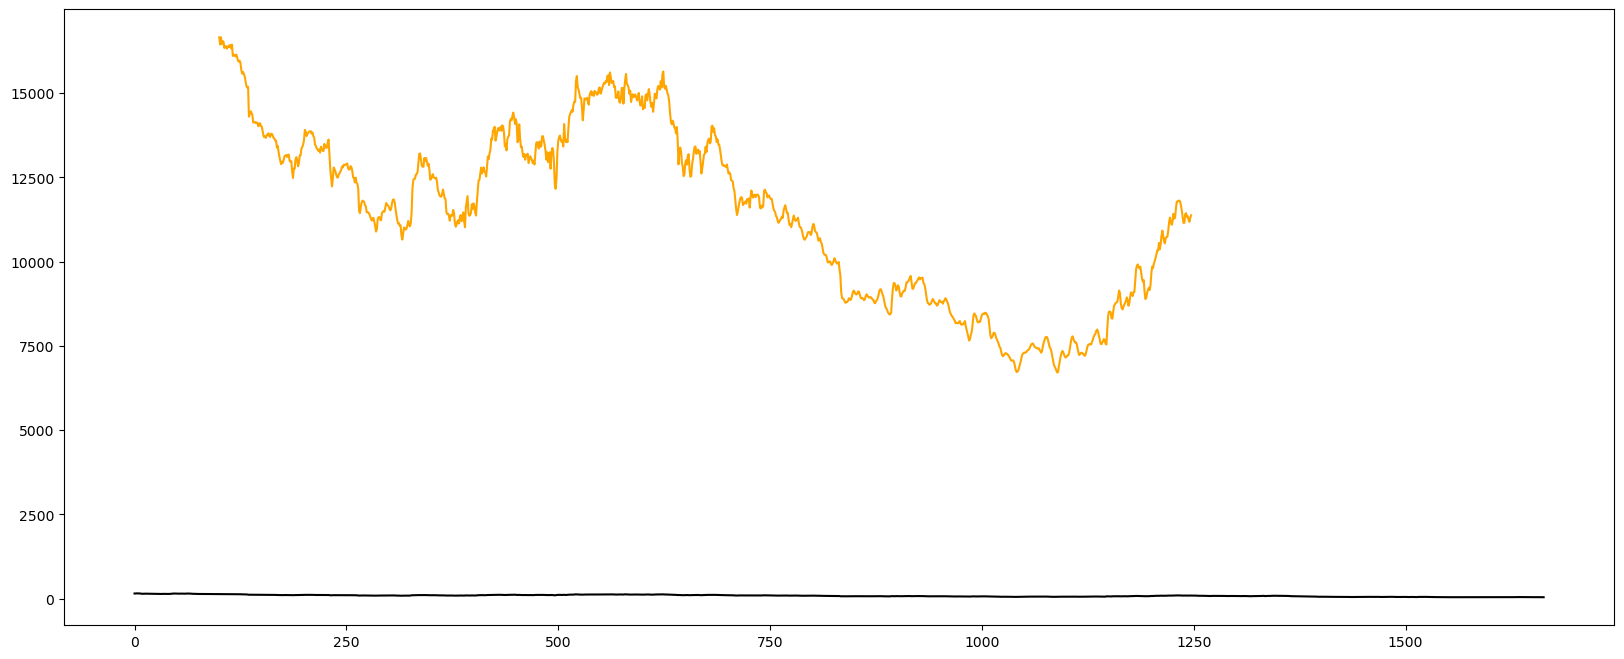

In [267]:
# Assuming df1 is your original DataFrame containing dollar signs
plt.subplots(figsize=(20,8))
plt.plot(scaler.inverse_transform(df1), color = 'black')
plt.plot(trainPredictPlot, color = 'orange')
plt.plot(testPredictPlot, color = 'green')
plt.show()
